# AmadeusGPT Demo: Horse Gait Analysis

- please get an openAI user key: https://platform.openai.com/api-keys.
- We suggest to run the demos locally, but it can be viewed on Google Colab. Some interactive features might not be available.

In [ ]:
!pip install --pre amadeusgpt

- Let's test that your open AI API Key works:

In [ ]:
mykey = "paste-your-key-here"

In [5]:
import os
if 'OPENAI_API_KEY' not in os.environ:
     os.environ['OPENAI_API_KEY'] = mykey

In [6]:
from openai import OpenAI

client = OpenAI(api_key=mykey)

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Hello"}]
)
print(response.choices[0].message.content)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Hello! How can I assist you today?



In [7]:
from amadeusgpt import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
from amadeusgpt.utils import parse_result
from amadeusgpt import create_project

## Please upload the demo video and associated files:
- you can grab it from here: https://github.com/AdaptiveMotorControlLab/AmadeusGPT/tree/mwm/docs/examples/Horse


In [ ]:
from google.colab import files

uploaded = files.upload()
for filepath, content in uploaded.items():
  print(f'User uploaded file "{filepath}" with length {len(content)} bytes')

video_path = Path(filepath).resolve()

- Set the scene number to visualize your video in a specific frame

- 🔥 Make sure your animal(s) are visible on that frame so gpt-4o can configure AmadeusGPT correctly

In [8]:
scene_frame_number = 100
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/Horse_template.yaml") #check the path to the config file

kwargs = {   
    "video_info.scene_frame_number" : scene_frame_number,
    "llm_info": {
                "gpt_model": "gpt-4o",
    }

}

config = create_project(data_folder = "../examples/Horse", #check the path to the data folder
                        result_folder = "results",
                        **kwargs
                        )

amadeus = AMADEUS(config, use_vlm = True)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)  

Project created at results. Results will be saved to results
The project will load video files (*.mp4) and optionally keypoint files from ../examples/Horse
A copy of the project config file is saved at results/config.yaml
{'data_info': {'data_folder': '../examples/Horse',
               'result_folder': 'results',
               'video_suffix': '.mp4'},
 'keypoint_info': {'include_confidence': False, 'use_3d': False},
 'llm_info': {'gpt_model': 'gpt-4o'},
 'object_info': {'load_objects_from_disk': False, 'use_grid_objects': False},
 'video_info': {'scene_frame_number': 100}}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0032 $
current input tokens 438
current accumulated tokens 503
description of the image frame provided
```json
{
    "description": "A person walking a horse on a dirt path with trees and a tent in the background.",
    "individuals": 1,
    "species": "sideview_quadruped",
    "background_objects": ["trees", "tent", "dirt path"]
}
```
['../examples/Horse/BrownHorseinShadow.mp4']


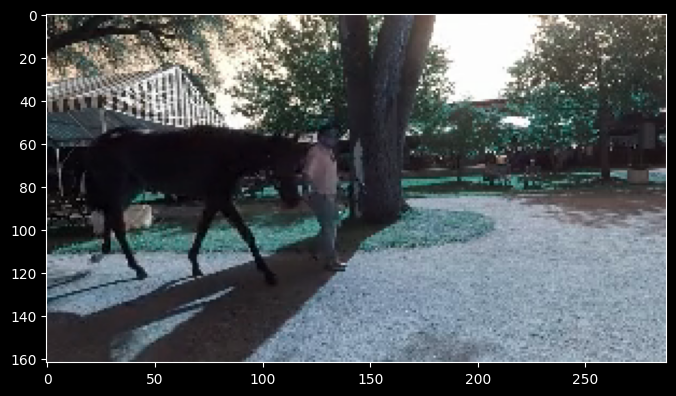

In [9]:
behavior_analysis = amadeus.get_behavior_analysis(video_file_path = '../examples/Horse/BrownHorseinShadow.mp4') #check the path to the video file
scene_image = behavior_analysis.visual_manager.get_scene_image()
plt.imshow(scene_image)

In [10]:
query = "Plot the gait analysis using Offfrontfoot; Offfrontfetlock; Offknee; Elbow and Shoulder."
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0197 $
current input tokens 2953
current accumulated tokens 3576


To plot the gait analysis using the specified keypoints, we can utilize the `run_gait_analysis` and `plot_gait_analysis_results` functions provided in the core API. The keypoints specified are 'Offfrontfoot', 'Offfrontfetlock', 'Offknee', 'Elbow', and 'Shoulder'. 

Here's how we can proceed:

1. Use `run_gait_analysis` to compute the gait parameters for the specified keypoints.
2. Use `plot_gait_analysis_results` to plot the results of the gait analysis.

Let's write the code to achieve this.

In [11]:
query = """ make an animation of the horse keypoints over time. Overlap the image frame on it. Save the animation on the disk. """
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.036 $
current input tokens 2996
current accumulated tokens 6661


To create an animation of the horse keypoints over time and overlap it with the image frame, we can follow these steps:

1. Retrieve the keypoints data using `get_keypoints`.
2. Retrieve the scene images using `get_scene_image`.
3. Create an animation using `matplotlib.animation.FuncAnimation` to animate the keypoints over the scene images.
4. Save the animation to disk.

Let's write the code to achieve this.